In [1]:
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, euclidean

import sys
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./health-dataset/bags.csv', header=None)
dataset = np.array(df.values)

In [41]:
N = 14
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(dataset)
print("done in {}s".format(time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=1, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.2407336235046387s


In [42]:
closest, distances = pairwise_distances_argmin_min(km.cluster_centers_, dataset)

distance1 = []
# distance2 = []
# distance3 = []
# distance4 = []
# distance5 = []

for i in dataset:
        distance1.append(np.linalg.norm(i - km.cluster_centers_[13]))
#         distance2.append(euclidean(i, km.cluster_centers_[1]))
#         distance3.append(euclidean(i, km.cluster_centers_[2]))
#         distance4.append(euclidean(i, km.cluster_centers_[3]))
#         distance5.append(euclidean(i, km.cluster_centers_[4]))

distance1 = np.asarray(distance1)
# distance2 = np.asarray(distance2)

IndexError: index 13 is out of bounds for axis 0 with size 7

In [ ]:
closest, distances

In [32]:
silhouette = metrics.silhouette_score(dataset, km.labels_)

silhouette

0.024601719957915356

In [156]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
prediction = km.predict(dataset[:])
labels = km.labels_
# print(prediction)
count = 0
for i in labels:
    if i == 2:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 2: Coalition 'undermined NHS' - doctors

Cluster 2: Review of case against NHS manager

Cluster 2: VIDEO: NHS: Labour and Tory key policies

Cluster 2: Public 'back tax rises to fund NHS'

Cluster 2: Five ideas to transform the NHS

Cluster 2: VIDEO: Miliband: Cameron 'failed' the NHS

Cluster 2: VIDEO: 'We must plan for future of NHS'

Cluster 2: VIDEO: BMA warning on 'seven-day NHS' plan

Cluster 2: Tories to pledge 'seven-day NHS'

Cluster 2: NHS: Labour's private profits cap

Cluster 2: Labour to cap private profits in NHS

Cluster 2: NHS medical accidents unit 'needed'

Cluster 2: VIDEO: NHS England 'deteriorating'

Cluster 2: NHS problems worst 'since 1990s'

Cluster 2: NHS trust put into special measures

Cluster 2: How bad has winter been for the NHS?

Cluster 2: Why not introduce more NHS charges?

Cluster 2: The NHS - a powerhouse for new medicines?

Cluster 2: VIDEO: Lucas questions NHS spending priorities

Cluster 2: Starting gun 'fired' on new NHS

Cluster 2: NHS '

In [17]:
for i in enumerate(closest):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: Who are the unvaccinated? @JoshLevs

Cluster 1: Who are the unvaccinated? @JoshLevs

Cluster 2: Who are the unvaccinated? @JoshLevs

Cluster 3: Who are the unvaccinated? @JoshLevs

Cluster 4: Who are the unvaccinated? @JoshLevs

Cluster 5: Who are the unvaccinated? @JoshLevs

Cluster 6: Who are the unvaccinated? @JoshLevs

Cluster 7: Who are the unvaccinated? @JoshLevs

Cluster 8: Who are the unvaccinated? @JoshLevs

Cluster 9: Who are the unvaccinated? @JoshLevs

Cluster 10: Who are the unvaccinated? @JoshLevs

Cluster 11: Who are the unvaccinated? @JoshLevs

Cluster 12: Who are the unvaccinated? @JoshLevs

Cluster 13: Who are the unvaccinated? @JoshLevs

Cluster 14: Today's #getfit tip @Greatist: LOL. Here's why --

Cluster 15: Who are the unvaccinated? @JoshLevs

Cluster 16: Who are the unvaccinated? @JoshLevs

Cluster 17: Who are the unvaccinated? @JoshLevs

Cluster 18: Who are the unvaccinated? @JoshLevs

Cluster 19: AUDIO: Schizophrenia assumptions challenged



In [ ]:
i = 0
for i in range(dataset.shape[0]):
    pass
print(i)

In [ ]:
km.inertia_

In [ ]:
run = True
if run:
    Nc = range(1, 50)

    kmeans = []
    score = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_jobs=6))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset).inertia_)

In [ ]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()

# PCA

In [43]:
for i in range(1200, 0, -100):
    pca = PCA(n_components=i)
    dataset_PCA = pca.fit_transform(dataset)
    total_variance = np.sum(pca.explained_variance_ratio_)
    if i % 50 == 0:
        print('{} components. Total variance: {}'.format(i, total_variance))
    if total_variance <= 0.95:
        print(i)
        print(total_variance)
        break

1200 components. Total variance: 0.9997693679955177
1100 components. Total variance: 0.9813025252099665
1000 components. Total variance: 0.9537150757987498
900 components. Total variance: 0.9162170758618252
900
0.9162170758618252


In [45]:
for i in range(1050, 0, -10):
    pca = PCA(n_components=i)
    dataset_PCA = pca.fit_transform(dataset)
    total_variance = np.sum(pca.explained_variance_ratio_)
    if i % 20 == 0:
        print('{} components. Total variance: {}'.format(i, total_variance))
    if total_variance <= 0.96:
        print(i)
        print(total_variance)
        break

1040 components. Total variance: 0.9655287935933812
1020 components. Total variance: 0.959744722273709
1020
0.959744722273709


In [46]:
pca = PCA(n_components=1020)
dataset_PCA = pca.fit_transform(dataset)

In [213]:
def kmeans_func():
    N = 5
    verbose = False

    km_PCA = KMeans(n_clusters=N, init='k-means++', max_iter=1200, n_init=3, n_jobs=6,
                    verbose=verbose)

    print("Clustering sparse data with {}".format(km_PCA))
    t0 = time()

    km_PCA.fit(dataset_PCA)
    print("done in {}s".format(time() - t0))
    return km_PCA

In [217]:
km_PCA = kmeans_func()
closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)
print(closest_PCA, distances_PCA)

while not (np.unique(closest_PCA).shape == closest_PCA.shape):
    km_PCA = kmeans_func()
    closest_PCA, distances_PCA = pairwise_distances_argmin_min(km_PCA.cluster_centers_, dataset_PCA)

    print(closest_PCA, distances_PCA)

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.263489246368408s
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.3893439769744873s
[231 404  99  99  99] [0.41563185 0.30403229 0.06383319 0.43555778 0.25338167]
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.180727958679199s
[ 99  99  99  99 231] [0.42814617 0.25723948 0.06720102 0.27746007 0.37070631]
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_cluster

done in 2.1875271797180176s
[ 231 1320  404   99   99] [0.48659791 0.38638039 0.38994492 0.06484004 0.2532172 ]
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.384305715560913s
[404 231 197  99  99] [0.39081868 0.38603884 0.50502659 0.42819202 0.06882782]
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.388112783432007s
[231  99  99 404 231] [0.29147261 0.06462964 0.25482416 0.39045928 0.34320534]
Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1200,
    n_clusters=5, n_init=3, n_jobs=6, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
done in 2.179400682449341s
[

In [218]:
silhouette_PCA = metrics.silhouette_score(dataset_PCA, km_PCA.labels_)

silhouette_PCA

0.0150600849975898

In [219]:
for i in enumerate(closest_PCA):
#     print(i)
    print('Cluster {}: {}'.format(i[0], health_lines[i[1]]))

Cluster 0: Are you wearing purple for #SpiritDay? They are:

Cluster 1: Pilots of wayward plane may have suffered from cerebral hypoxia. Here's what that is:

Cluster 2: #StrokeChat #WorldStrokeDay

Cluster 3: Who are the unvaccinated? @JoshLevs

Cluster 4: More paramedics quitting NHS jobs



In [221]:
labels = km_PCA.labels_
count = 0
for i in labels:
    if i == 1:
        print("Cluster {}: {}".format(i, health_lines[count]))
    count += 1

Cluster 1: RT @cnnireport: Parents: What is your message to people who don’t vaccinate their kids? Share your video:

Cluster 1: RT @CNNLiving: Why do people stay in abusive relationships? #RayRice video prompts stories of #WhyIStayed and #WhyILeft

Cluster 1: @SoapBox_Ponch @CNN Good Q! That study said gluten sensitivity may not be real. Check out this @ErinBurnett video:

Cluster 1: How does your city inspire healthy habits? Show us in a short @cnnireport video and you could be on @CNN!

Cluster 1: How does your city inspire healthy habits? Show us in a short @cnnireport video and you could be on @CNN

Cluster 1: RT @NewDay: See the @GoPro-captured live birth video that made @JohnBerman this queasy:

Cluster 1: RT @CNNFitNation: CYBER MONDAY DEAL! Send in a video and change your life forever! 100% off! Sale ends at midnight!

Cluster 1: RT @drsanjaygupta: a rare look inside a village where every resident has severe dementia. entire video is now here.

Cluster 1: Love it! RT @Eisenhow

In [222]:
run = True
if run:
    Nc = range(2, 10)

    kmeans = []
    score = []
    silhouettes = []

    for i in Nc:
        kmeans.append(KMeans(n_clusters=i, n_init=3, n_jobs=6, max_iter=1200))

    for i in range(len(kmeans)):
        print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
        score.append(kmeans[i].fit(dataset_PCA).inertia_)
        silhouettes.append(metrics.silhouette_score(dataset_PCA, kmeans[i].labels_))

Fitting kmeans with 2 clusters
Fitting kmeans with 3 clusters
Fitting kmeans with 4 clusters
Fitting kmeans with 5 clusters
Fitting kmeans with 6 clusters
Fitting kmeans with 7 clusters
Fitting kmeans with 8 clusters
Fitting kmeans with 9 clusters


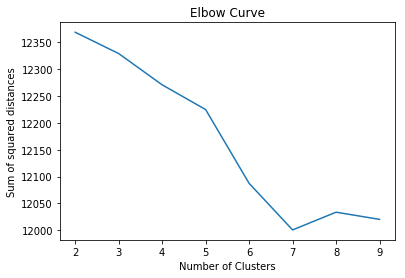

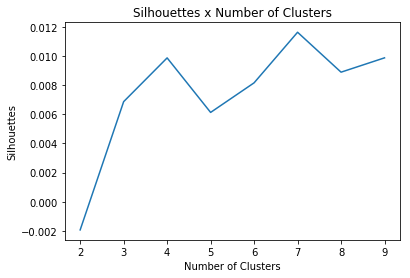

In [223]:
if run:
    plt.plot(Nc,score)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Sum of squared distances')

    plt.title('Elbow Curve')

    plt.show()
    
    
    plt.plot(Nc,silhouettes)

    plt.xlabel('Number of Clusters')

    plt.ylabel('Silhouettes')

    plt.title('Silhouettes x Number of Clusters')

    plt.show()

# Aqui tentei usar o txt para fazer o k-means, mas não terminei

In [ ]:
health_lines = []
with open('health-dataset/health.txt', 'r') as health_txt:
    health_aux = health_txt.readlines()
    health_aux.pop(0)
    for i in health_aux:
        health_lines.append(i.split('|')[-1])
len(health_lines)

In [ ]:
from nltk.corpus import stopwords
import nltk
# nltk.download()

In [ ]:
sw = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=sw)
X = vectorizer.fit_transform(health_lines)
# X = vectorizer.transform(health_lines)

In [ ]:
type(X)

In [ ]:
print(X)

In [ ]:
vectorizer.vocabulary_

In [ ]:
N = 6
verbose = False

km = KMeans(n_clusters=N, init='k-means++', max_iter=1000, n_init=1,
                verbose=verbose)

print("Clustering sparse data with {}".format(km))
t0 = time()
km.fit(X)
print("done in {}s".format(time() - t0))

In [ ]:
Nc = range(1, 30)

kmeans = []
score = []

for i in Nc:
    kmeans.append(KMeans(n_clusters=i))

for i in range(len(kmeans)):
    print('Fitting kmeans with {} clusters'.format(kmeans[i].n_clusters))
#     score.append(kmeans[i].fit(X).score(X))
    score.append(kmeans[i].fit(X).inertia_)

In [ ]:
plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [ ]:
print(km.predict(X[10:20]))